# Example analysis

In this notebook, we'll load some data in from `scikit-learn` and use that Python package to do some machine learning on the dataset, visualising the results inline, in the notebook.

In [1]:
# Load Python imports
import graphviz as gv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## Load and standardise dataset

We're going to load the classic Iris statistical dataset from the `scikit-learn` library, and split into predictor (`X`) and target (`y`) datasets.

In [2]:
# Get iris predictor and target data
iris = datasets.load_iris()
X, y = iris.data, iris.target
X = X[:, [2, 3]]  # restrict predictor data to petal length and petal width

We split the data into a *training* set, and a *test* set:

In [3]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

We standardise the dataset to make it suitable for ML approaches

In [4]:
# Mean-centre and unit scale the training data
sc = StandardScaler()
sc.fit(X_train)  # estimate mean and standard deviation for scaling
X_train_std = sc.transform(X_train)  # scale training set
X_test_std = sc.transform(X_test)  # scale test set

We'll find it useful later to have the recombined standardised dataset for plotting decision boundaries

In [5]:
#  Combine the sets
X_combined_std = np.vstack((X_train_std, X_test_std))  # combined predictor data
y_combined = np.hstack((y_train, y_test))  # combined target classes

## Build a decision tree classifier

We train a decision tree classifier on the standardised data.

In [6]:
# Train decision tree
tree = DecisionTreeClassifier(criterion="entropy",
                              max_depth=3, random_state=42).fit(X_train_std, y_train)

## Visualise the decision tree

We can use the `python-graphviz` library to show the decision tree, for interpretation:

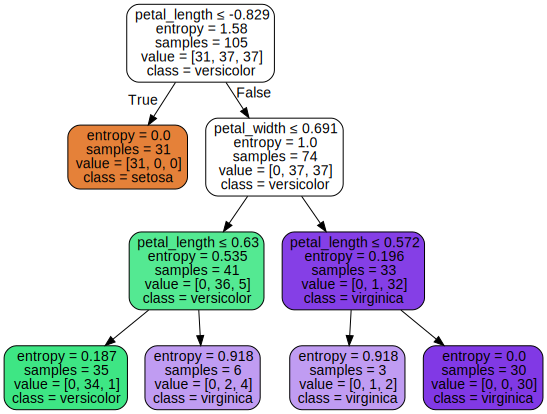

In [7]:
# Capture tree as a graph
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=["petal_length", "petal_width"],
                           class_names=["setosa", "versicolor", "virginica"],
                           filled=True, rounded=True,
                           special_characters=True)

# Render tree with graphviz
graph = gv.Source(dot_data)
graph

## Plot decision regions

We create a function (`plot_decision_regions()`) that allows us to plot decision regions for the classifier:

In [8]:
def plot_decision_regions(
    X, y, classifier, resolution=0.02, labels=["neg", "pos"], test_idx=None
):
    """Return a matplotlib plot of 2D decision regions

    :param X: {array-like}, shape=[n_samples, n_features]
        dataset to plot
    :param y: {array-like}, shape=[n_samples]
        class of each datapoint in X
    :param classifier: classifier with .predict method
        to classify each point in the mesh
    :param resolution: mesh point separation
    :param labels: list of two labels for negative and positive classes
        (in that order)
    :param test_idx: indices of test data to be highlighted
    """
    # Get limits of mesh, from dataset
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create meshgrid and predictions
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Create plot axis and colour boundaries
    ax = plt.subplot()
    ax.contourf(xx1, xx2, Z, alpha=0.4)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    # Plot class samples
    labeldict = {idx: lbl for (idx, lbl) in zip(sorted(np.unique(y)), labels)}
    for idx, cls in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cls, 0], y=X[y == cls, 1], alpha=0.7, label=labeldict[cls])

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        ax.scatter(
            x=X_test[:, 0],
            y=X_test[:, 1],
            alpha=0.85,
            color=".2",
            marker="+",
            label="test data",
        )

    # Add legend
    ax.legend()

    return ax

We use this function to show the decision regions:

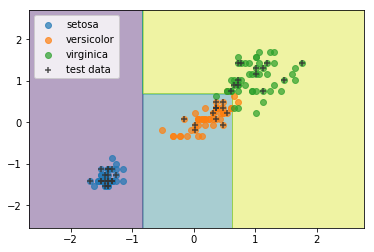

In [9]:
plot_decision_regions(X_combined_std, y_combined, classifier=tree,
                      labels=["setosa", "versicolor", "virginica"],
                      test_idx=range(105, 150));